# Loan Application Status Prediction

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [1]:
# Installing imblearn which could be used for balancing the imbalanced classes
!pip install imblearn

In [3]:
# Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This is the dataset, 
we have 614 rows(0-613).
We have 13 columns(0-12).
We can also infer from here that the target column is "Loan_Status" and it contains categorical data (has 2 classes Y/N),
hence is a Classification Problem
We need to use Classification models to perform our predictions.

# Exploratory Data Analysis(EDA)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


df.tail() displays the last 5 row values(indexed from 609-613) from the dataset

In [7]:
df.shape

(614, 13)

No. of rows - 614, No. of columns - 13

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

df.columns gives the names of the column headings

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The independent variables "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" and "Credit_History" contains float values and
its datatype is float.
The independent variable "Loan_ID" has alphanumeric values and is identified as object datatype.
The independent variable "Dependents" numeric plus arithematic symbol as values and is identified as object.
The independent variables , "Gender", "Married",  "Education", "Self_Employed", "Property_Area" and 
the dependent variable or the target column "Loan_Status" has string values and is of string datatype.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From here we can infer that the columns "Loan_ID", "Education", "ApplicantIncome", "CoapplicantIncome", "Property_Area" and 
"Loan_Status" contains no null values present in them.
All the rest columns in our dataset contains null values, so we need to treat them

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From here we can infer that we have missing values present in few columns. 
The columns that have missing values present in them are "Gender", "Married", "Dependents", "Self_Employed ", "LoanAmount",
"Loan_Amount_Term", "Credit_History".
The solution to this is that we need to fill some values in them.
 Let's find out the location.

In [12]:
np.where(pd.isnull(df)) #This is to find the location if incase null values are present in the dataset

(array([  0,  11,  16,  19,  19,  23,  24,  24,  29,  30,  30,  35,  36,
         42,  44,  45,  63,  73,  79,  81,  83,  86,  95,  95,  95, 102,
        102, 103, 104, 104, 107, 111, 112, 113, 114, 117, 120, 125, 126,
        127, 129, 130, 156, 158, 165, 170, 171, 181, 187, 188, 197, 198,
        202, 218, 219, 223, 226, 228, 228, 231, 232, 236, 236, 237, 259,
        260, 268, 279, 284, 293, 295, 301, 305, 309, 313, 314, 317, 318,
        322, 323, 332, 333, 334, 335, 335, 336, 338, 344, 346, 348, 355,
        363, 367, 374, 377, 380, 385, 387, 392, 395, 411, 411, 421, 423,
        432, 435, 435, 435, 437, 444, 447, 449, 451, 460, 460, 463, 467,
        468, 473, 477, 479, 490, 491, 497, 503, 506, 507, 517, 524, 530,
        533, 535, 542, 544, 550, 551, 556, 565, 571, 576, 579, 583, 588,
        592, 597, 600, 600, 601, 605], dtype=int64),
 array([ 8,  5, 10,  5,  9,  1,  5, 10,  5,  5, 10,  8,  9, 10,  9,  9,  8,
         9, 10,  8, 10, 10,  5,  8, 10,  3,  8,  8,  2,  3,  5,  5, 

In [13]:
df.iloc[0,8]

nan

In [14]:
[df.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df)))]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

All the values of rows and columns passed in the for loop has NaN 

Finding values which are empty strings

In [15]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

No empty strings present in any location of our dataset

# Missing value treatment

In [16]:
# For the categorical data, the best solution is to fill missing values with mode
# For continuous and normally distributed data, the best solution is to fill the missing values with mean
# For continuous but not normally distributed data, the best solution is to fill the missing values with median

In [17]:
# Finding categorical columns and continuous columns
df["Gender"].unique() 

array(['Male', 'Female', nan], dtype=object)

Gender is a categorical column with male and female as the categories, presence of NaN as seen above.

In [18]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

Married is a categorical column with Yes and No as the categories, presence of NaN as seen above.

In [19]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Dependents is a categorical column with 0, 1, 2 and 3+ as the categories, presence of NaN as seen above.

In [20]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

Self_Employed is a categorical column with Yes and No as the categories, presence of NaN as seen above.

In [21]:
df["Loan_Amount_Term"].unique()


array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

There are 10 categories of loan amount terms present and even this is a categorical column

In [22]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

Credit_History is a categorical column with 1.0 and 0.0 as the categories, presence of NaN as seen above.

In [23]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

The LoanAmount is a continuous column since it has continuous data.

Since the LoanAmount is numerical, lets check its distribution and decide whether to fill the missing values with either mean
or median

# Data Visualization for column LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

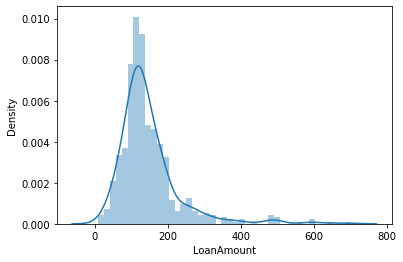

In [24]:
sns.distplot(df["LoanAmount"])

Here we can see that the data in the column LoanAmount is normally distributed hence we can use mean to fill the 
missing values

In [25]:
# Filling categorical columns with mode of the data
# Filling continuous data with mean of their values as the data is normally distibuted

#categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we can see that all the missing values are filled and null values in all the columns is equal to zero.

In [27]:
# Trying to find the duplicate rows in our dataset
duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the dataset
df[duplicate]               # prints the duplicate rows in the dataset

0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There are no duplicates present in our dataset and hence no need of any duplicate treatment here

In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [29]:
# From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
# So from min and max values, we basically get the range
# There seems to be some outliers for the Applicant Income , Coapplicant income and Loan Amount,
# anyways will verify that when we check for outliers presence.  
# We also see that about 85% applicants have a credit_history. Because the mean of Credit_History field is 0.85 
# and it has either (1 for having a credit history or 0 for not)
# We can min value of "CoapplicantIncome" and "Credit_History" is zero.

In [30]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [31]:
# The Loan_Status is our target column and it shows that we have 2 classes "Yes" and "No"

In [32]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Data Visualization

# Uni-Variant Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64

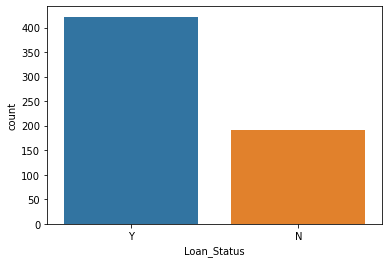

In [33]:
sns.countplot(df["Loan_Status"])
df["Loan_Status"].value_counts()

In [34]:
# We can clearly visualize that our target column has 2 classes "Y" and "N" and are imbalanced
# We need to balance the classes
# 422 number of applicants are eligible for Loan
# 192 number of applicants are not given approval to avail loan
# So the majority of applicants are eligible for loan

Male      502
Female    112
Name: Gender, dtype: int64

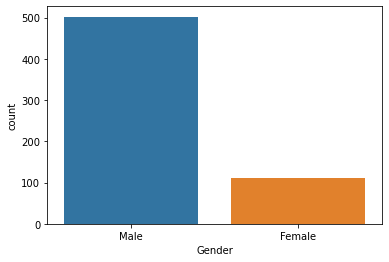

In [35]:
sns.countplot(df["Gender"])
df["Gender"].value_counts()

In [36]:
# We can infer that among the loan applicants 502 are Males and 112 are Females
# So here the majority applicants who is need of loan are Males

Yes    401
No     213
Name: Married, dtype: int64

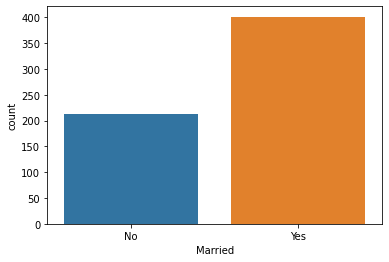

In [37]:
sns.countplot(df["Married"])
df["Married"].value_counts()

In [38]:
# We can infer that among the loan applicants 401 are Married and 213 are Unmarried
# Majority of loan applicants are Married

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

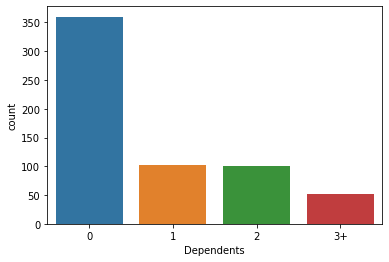

In [39]:
sns.countplot(df["Dependents"])
df["Dependents"].value_counts()

In [40]:
# We can infer that the dependents are categories into 0, 1, 2 and 3+
# 360 applicants are categorized as 0
# 102 applicants are categorized as 1
# 101 applicants are categorized as 2
# 51 applicants are categorized as 3+
# Majority of dependents belongs to category 0

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

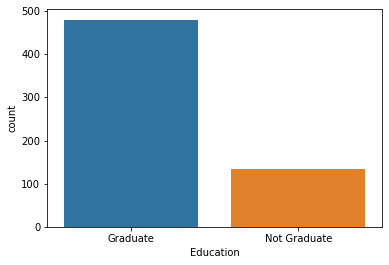

In [41]:
sns.countplot(df["Education"])
df["Education"].value_counts()

In [42]:
# Among the applicants, 480 are Graduates and 134 are Not Graduates
# Majority of loan applicants are Graduates.

No     532
Yes     82
Name: Self_Employed, dtype: int64

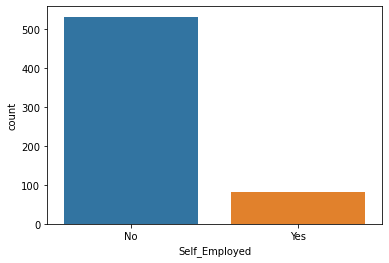

In [43]:
sns.countplot(df["Self_Employed"])
df["Self_Employed"].value_counts()

In [44]:
# Among the applicants, 532 are not self-employed and only 82 are self-employed
# Here majority of applicants are not self-employed.
# Few 

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

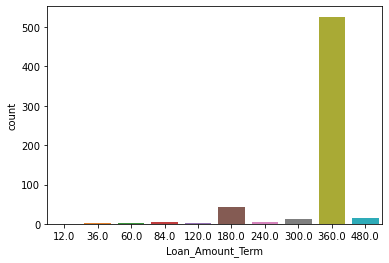

In [45]:
sns.countplot(df["Loan_Amount_Term"])
df["Loan_Amount_Term"].value_counts()

In [46]:
# Among the applicants, only 1 applicant opt for 12 cyclic loan term
# 2 applicants opt for 36 cyclic and 60 cyclic of loan term each 
# 3 applicants opt for 120 cyclic term
# 4 applications opt for 240 and 84 cyclic of loan term each
# 13 applicants opt for 300 cyclic term
# 15 applicants opt for 480 cyclic term
# 44 applicants opt for 180 cyclic term
# 526 applicants opt for 360 cyclic term
# So majority of applicants goes with 360 cyclic of Loan_Amount_Term
# Minority amount of people/ applicants opt for 12, 60, 36, 240, 84 and 120 cyclic of loan terms

1.0    525
0.0     89
Name: Credit_History, dtype: int64

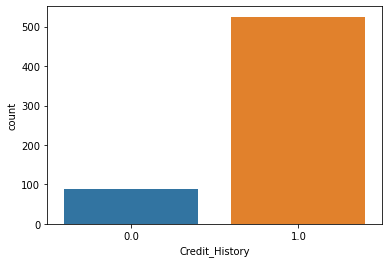

In [47]:
sns.countplot(df["Credit_History"])
df["Credit_History"].value_counts()

In [48]:
# From here we can infer that 525 applicants have credit history
# 89 applicants have no credit history
# So majority of applicants are already having the credit history and are able to pay thier loans

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

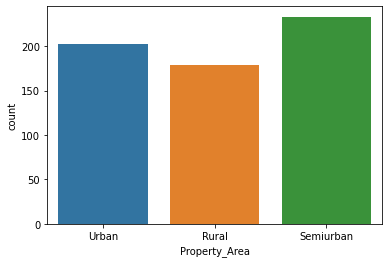

In [49]:
sns.countplot(df["Property_Area"])
df["Property_Area"].value_counts()

In [50]:
# From here we can infer that 233 of applicants have their property located in Semiurban area
# 202 of applicants have their property located in urban area
# 179 of applicants have their property located in rural area
# So majority of applicants have their property in Semiurban area.

# Bi-Variant Analysis

<AxesSubplot:xlabel='count', ylabel='Gender'>

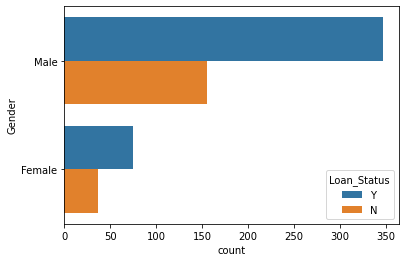

In [51]:
sns.countplot(y = "Gender", hue = "Loan_Status", data = df)

In [52]:
# The info that we can infer from here is that more Males are on loan than females
#  Also, those that are on loan are more than ones not on loans

<AxesSubplot:xlabel='count', ylabel='Married'>

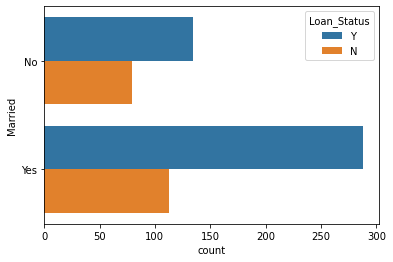

In [53]:
sns.countplot(y = "Married", hue = "Loan_Status", data = df)

In [54]:
# The info that we can infer from here is that Married people are more on loan compared with unmarried people.

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

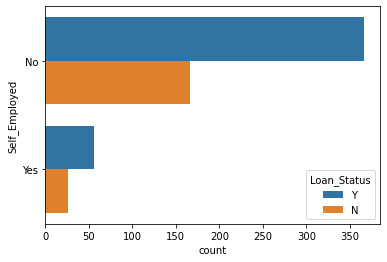

In [55]:
sns.countplot(y = "Self_Employed", hue = "Loan_Status", data = df)

In [56]:
# Self_employed people take very less loan compared to the ones that are not self-employed
# That’s those are not self-employed probably salalary earners obtain more loan.

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

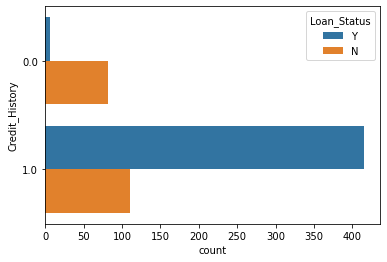

In [57]:
sns.countplot(y = "Credit_History", hue = "Loan_Status", data = df)

In [58]:
# We can see that people with credit history are higher and hence greater no. of people pay back their loans

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

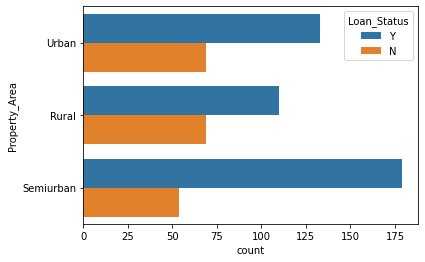

In [59]:
sns.countplot(y = "Property_Area", hue = "Loan_Status", data = df)

In [60]:
# Majority of applicants who have loans have their property in Semiurban area and then comes Urban and lastly rural.

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

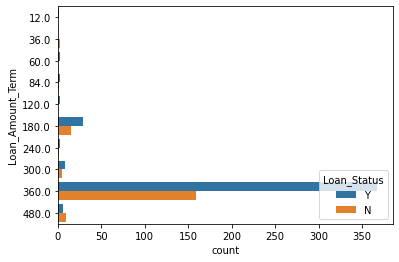

In [61]:
sns.countplot(y = "Loan_Amount_Term", hue = "Loan_Status", data = df)

In [62]:
# The info from here is that an extremely high number of them go for a 360 cyclic loan term. 

# Multi-Variant Analysis

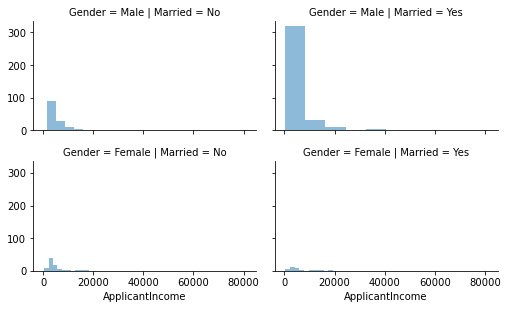

In [63]:
# Lets analyze various features with respect to ApplicantIncome because if income is decent then he would be able to pay back loan
grid = sns.FacetGrid(df, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [64]:
# The info we can draw from here is that females have very less income compared to males.
# Males generally have the highest income. 
# Males who are married have greater income that unmarried male. 
# Married females have even lesser income in comparision with unmarried females.

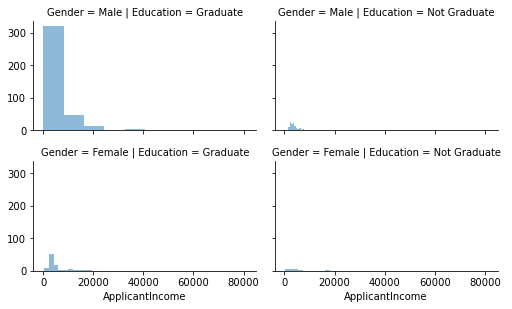

In [65]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [66]:
# The info that we can infer from here is that the male who is a graduate has more income 
# Male who is not a graduate has very less income
# And the females who are graduates has more income when compared with the females who dont hold graduation.

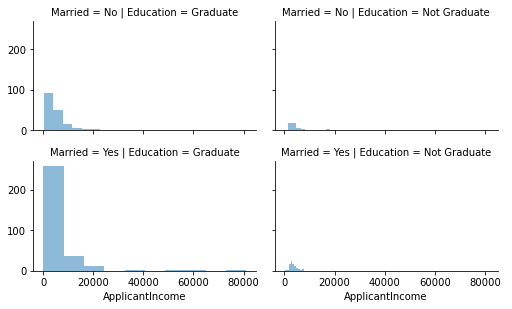

In [67]:
grid = sns.FacetGrid(df, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [68]:
# Analysis from here is that a person who is married and is a graduate has higher income
# Unmarried Graduate also holds an higher income when compared to a married and not graduate person.

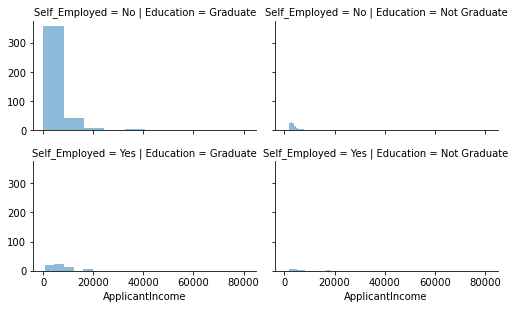

In [69]:
grid = sns.FacetGrid(df, row='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [70]:
# Analysis from here is a person who is not sefl-employed but holding Graduation has highest income
# All other cases the income is very very low

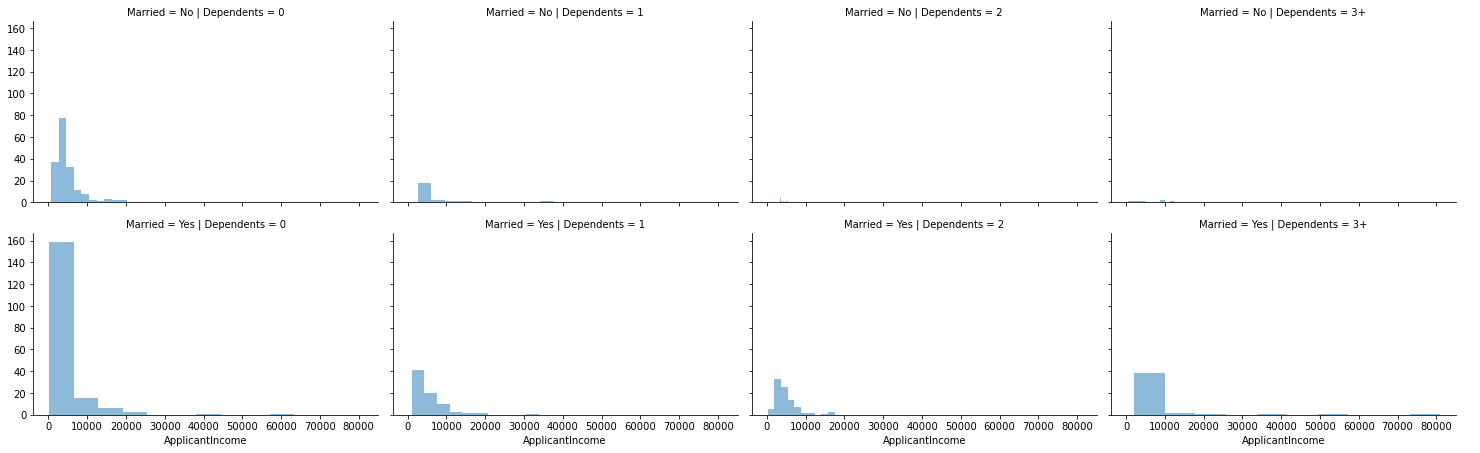

In [71]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [72]:
# Analysis from here is the ones who are not dependent at all have more income whether it be married or unmarried
# Not married and no one is dependent on such has more income. 
# Also, Married and no one dependent has greater income with a decreasing effect as the dependents increases


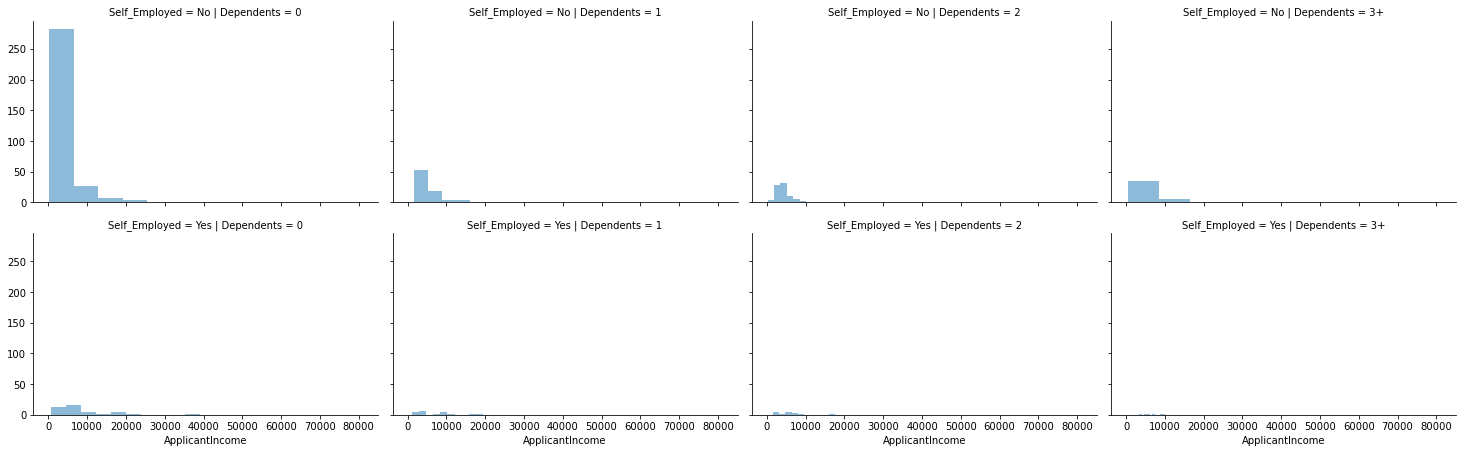

In [73]:
grid = sns.FacetGrid(df, row='Self_Employed', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [74]:
# Mainly the ones who are not self-employed and having no dependents at all have higher income
# Being self-employed and having dependents have very least income

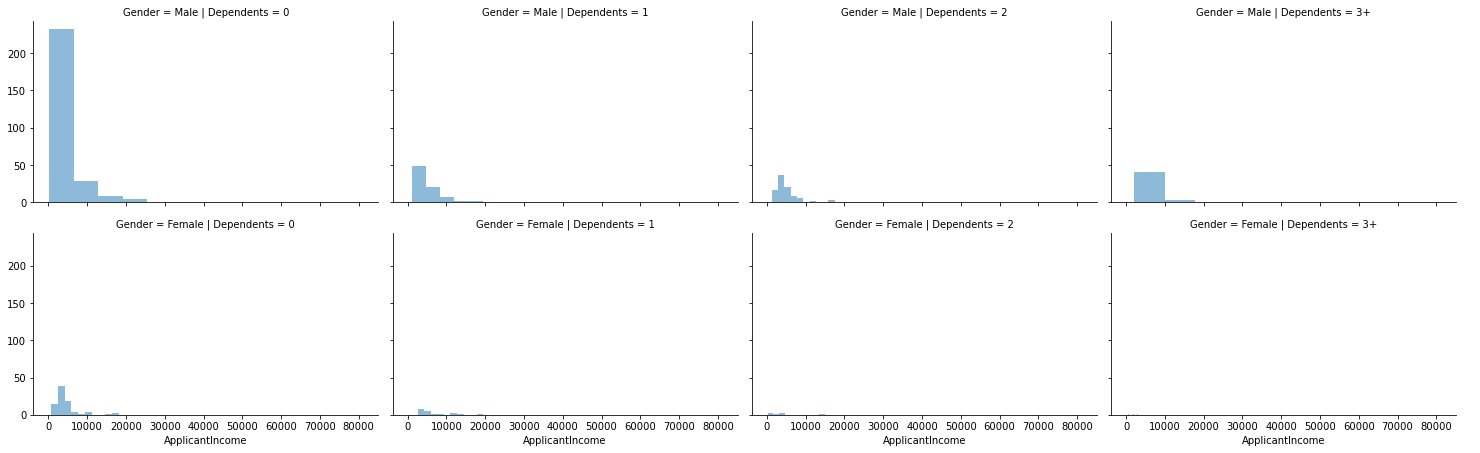

In [75]:
grid = sns.FacetGrid(df, row='Gender', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [76]:
# Analysis or the observations from here is that the males with no dependents have great income
# As the dependents increases for males the income decreases
# Females with no dependents at all also has income compared to the ones having dependents

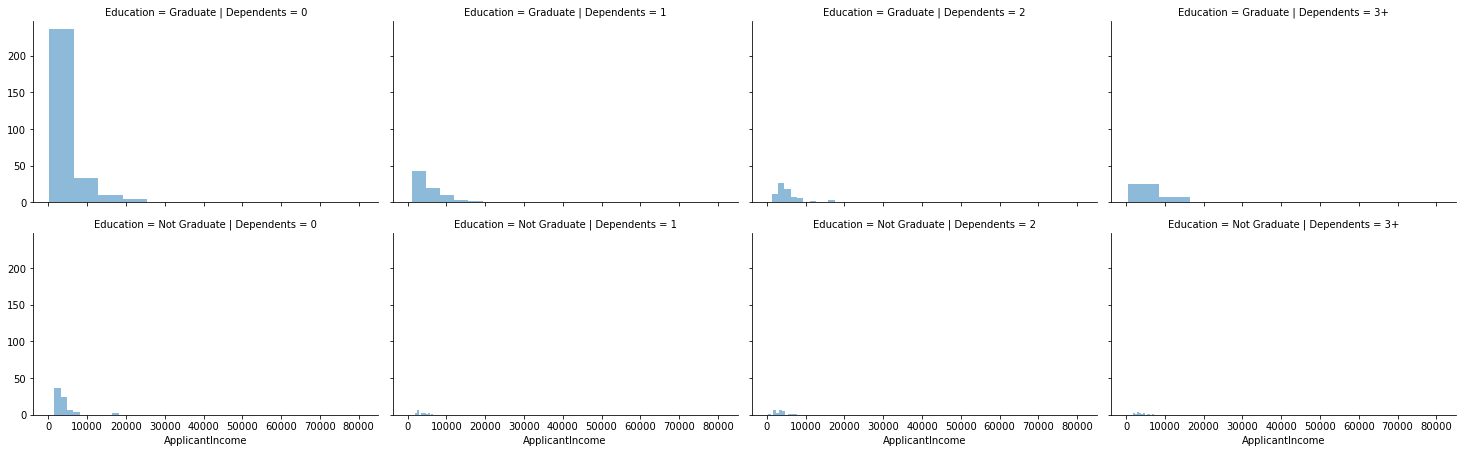

In [77]:
grid = sns.FacetGrid(df, row='Education', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [78]:
# Observation from here is that the ones holding graduation and having no dependents have greater income
# Graduates income decreases as the dependents increases
# Non-Graduates with no dependents have some income and becomes very very least as the dependents increase by
# A graduate with no one dependent has more income

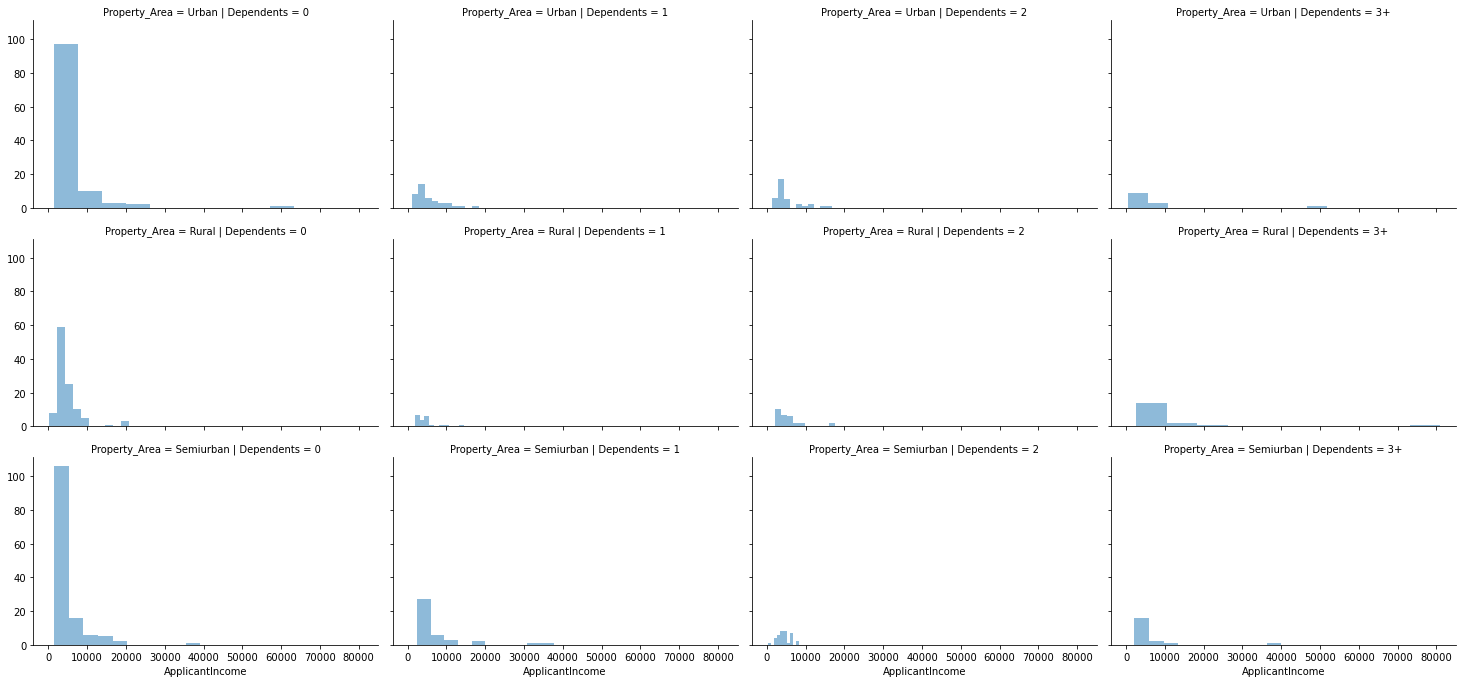

In [79]:
grid = sns.FacetGrid(df, row='Property_Area', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [80]:
# Observations from here are ,
# Applicants with no dependents and having the property in Semiurban area have very great income
# Applicants with no dependents and having the property in urban area have great income
# Applicants with no dependents and having the property in rural area also have decent income
# And the income decreases in all the cases with the increase in dependents

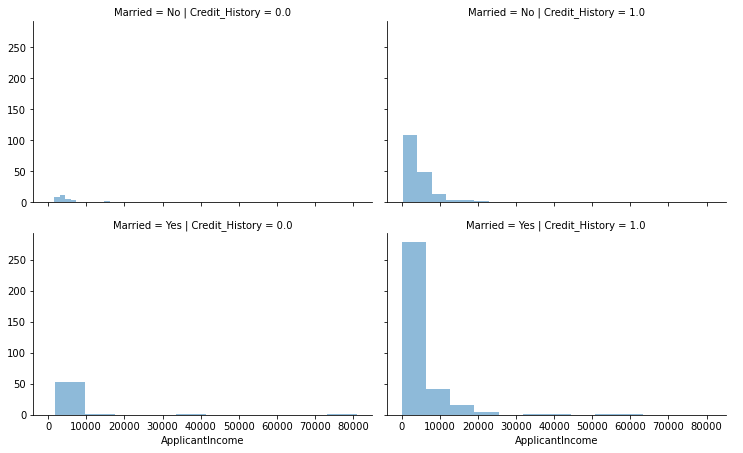

In [81]:
grid = sns.FacetGrid(df, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [82]:
# Analysis here is the one with credit history have high income
# So it means the ones with higher income are able to pay back their loans
# Married and has a good credit history depicts more income. 
# Also, Not married but has a good credit history follows in the hierarchy.

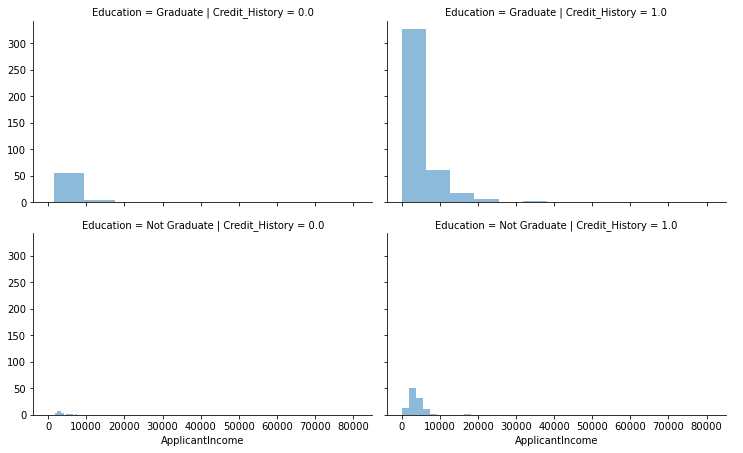

In [83]:
grid = sns.FacetGrid(df, row='Education', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

In [84]:
# Observations from here are 
# Graduates with good credit history depicts a good income.
# Also, not a graduate and have a good credit history can be traced to having a better income than the ones with no degree

In [85]:
#turn loan status into binary 
modified=df
modified['Loan_Status']=df['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64

People with a credit history a way more likely to pay their loan, 0.07 vs 0.79 . This means that credit history will be an influential variable in our model.

In [86]:
# Some people might have a low income but strong CoappliantIncome so a good idea is to combine them in a TotalIncome column.

In [87]:
df['TotalIncome']= df['ApplicantIncome']+df['CoapplicantIncome'] 

In [88]:
df['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64

In [89]:
# So now since we have combined applicant and co-applicant Income, let us drop the applicantincome and co-appicantincome
#columns from our dataset

In [90]:
df.drop(['ApplicantIncome'],axis=1,inplace=True)


In [91]:
df.drop(['CoapplicantIncome'],axis=1,inplace=True)

In [92]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,1,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,1,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,1,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,1,7583.0


In [93]:
# The Loan_ID is just for tracking purpose and is not useful for our predictions, hence lets drop the Loan ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

In [94]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,1,7583.0


In [95]:
# Now that we have 614 rows and 11 columns, lets perform label encoding on columns with string values

In [96]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in category:   
    df[i] = encoder.fit_transform(df[i]) 
df.dtypes

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int64
TotalIncome         float64
dtype: object

In [97]:
# Now that we can see that we dont have any datatype as object, we have integer and float as datatypes for our columns

In [98]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


Let's plot heatmap (Multi-Variant Analysis)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Married'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Self_Employed'),
  Text(0, 5.5, 'LoanAmount'),
  Text(0, 6.5, 'Loan_Amount_Term'),
  Text(0, 7.5, 'Credit_History'),
  Text(0, 8.5, 'Property_Area'),
  Text(0, 9.5, 'Loan_Status'),
  Text(0, 10.5, 'TotalIncome')])

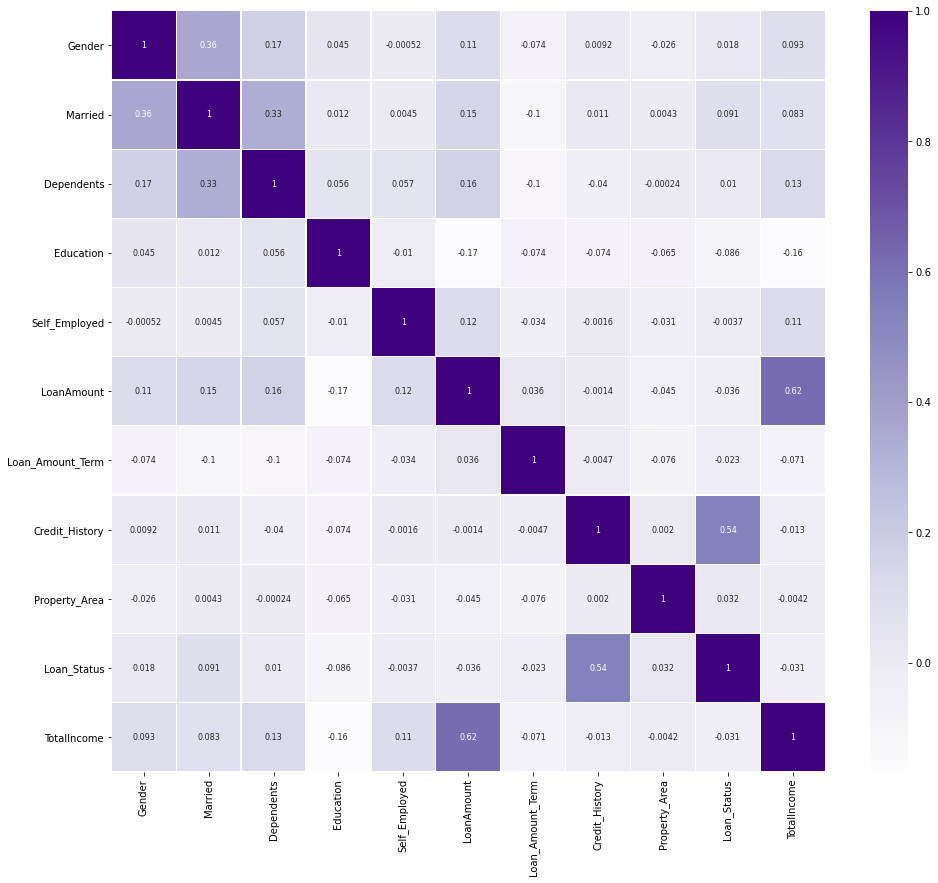

In [99]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

In [100]:

# From this heatmap we have got the correlation values and we can see that the column "Credit_History" has high positive 
# correlation with the target column compared to all other columns
# So if the Credit_History is high, the chance of getting loan approved is high
# The column "Self_Employed" has weak negative correlation value(-0.0037) with the target variable(not a very important
# factor because the correlation value is close to zero)
# The other columns with negative correlation with the target variable is "Education", "Loan_Amount", "Total_Income" and "Loan_Amount_Term".


In [101]:
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.074030,0.009170,-0.025752,0.017987,0.093191
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100912,0.010938,0.004257,0.091478,0.083319
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.103864,-0.040160,-0.000244,0.010118,0.125590
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884,-0.161362
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033739,-0.001550,-0.030860,-0.003700,0.113000
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.036475,-0.001431,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,0.036475,1.000000,-0.004705,-0.076120,-0.022549,-0.070917
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.001431,-0.004705,1.000000,0.001963,0.540556,-0.012563
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.076120,0.001963,1.000000,0.032112,-0.004218
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,-0.036416,-0.022549,0.540556,0.032112,1.000000,-0.031271


In [102]:
# This is the correlation values for our dataset which we saw visually using the heatmap
# We can see that the Credit_History has high positive correlation with our target variable i.e., Loan_Status

In [103]:
# Representing which columns have positive and negative correlations with the target column

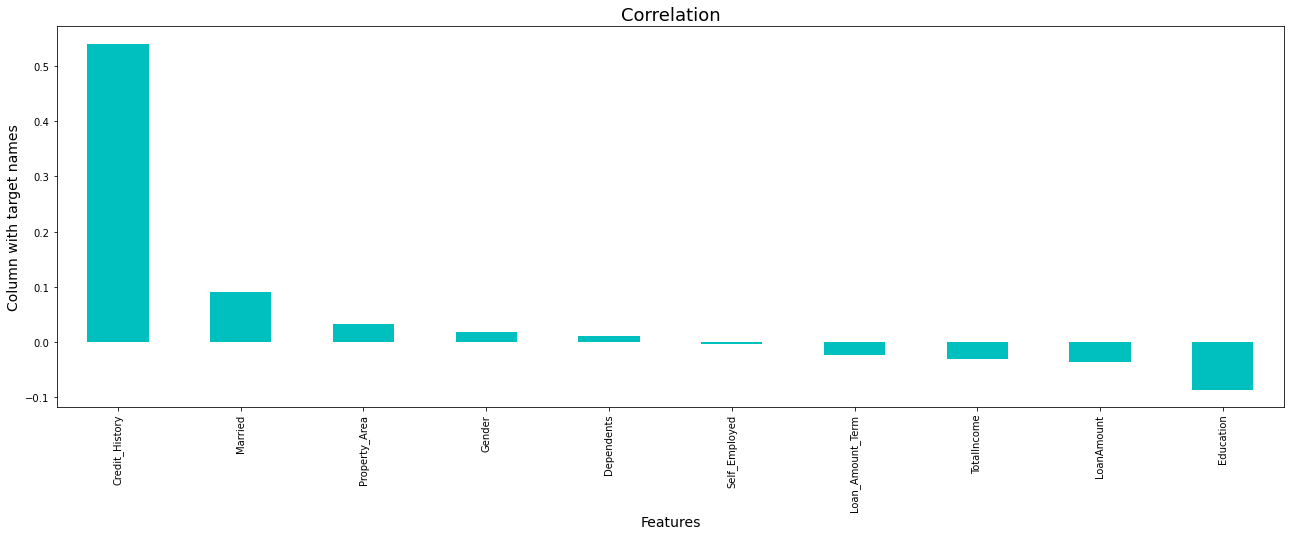

In [104]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(["Loan_Status"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [105]:
# Here we can infer that the columns "Credit_History", "Married", "Property_Area", "Gender" and "Dependents" are positively 
# correlated with our target column
# And the variables "Self_Employed", "Loan_Amount_Term", "TotalIncome", "LoanAmount" and "Education" are negatively correlated
# Credit_History has high positive correlation i.e., 0.54 and is an important feature in prediction of Loan Status

Checking for the presence of outliers

In [106]:
# There is no need to check for skewness or the presence of outliers for categorical columns, so let's just check for "TotalIncome"
# and "LoanAmount".

<AxesSubplot:xlabel='TotalIncome'>

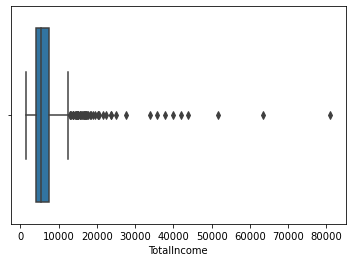

In [107]:
sns.boxplot(df["TotalIncome"])

In [108]:
# We can see the presence of outliers here and we need to treat them

<AxesSubplot:xlabel='LoanAmount'>

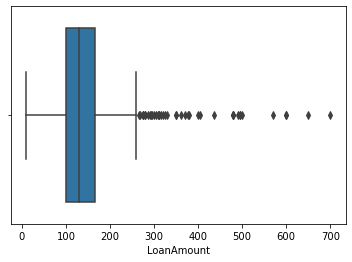

In [109]:
sns.boxplot(df['LoanAmount'])

In [110]:
# Presence of outliers in Loan Amount

In [111]:
df.skew()

Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
Self_Employed       2.159796
LoanAmount          2.726601
Loan_Amount_Term   -2.402112
Credit_History     -2.021971
Property_Area      -0.066196
Loan_Status        -0.809998
TotalIncome         5.633449
dtype: float64

In [112]:
# We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of few columns outside the above mentioned range and they need to be treated. The columns with high skewness 
# are "Loan Amount" and "TotalIncome".

# Considering to remove the outliers

In [113]:
df.shape

(614, 11)

In [114]:
# So this is the shape of our dataset before removing the outliers
# We have 614 rows and 11 columns

In [115]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 242,
        262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495, 497,
        506, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604], dtype=int64),
 array([ 6,  6,  6,  5,  6,  5, 10,  5, 10,  5, 10, 10,  6,  6,  5,  5,  6,
         5, 10,  5, 10,  5, 10,  5,  6,  6,  5, 10,  5,  5,  6,  5,  6, 10,
         6, 10,  5], dtype=int64))

In [116]:
df_new_z=df[(z<3).all(axis=1)] 
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


In [117]:
df_new_z.shape  # info of data after removing outliers

(581, 11)

In [118]:
# Now that we can observe the row size of our dataset is reduced 
# Now we have 581 rows present

In [119]:
# Calculating the percentage of data loss

In [120]:
Data_loss=((614-581)/614)*100

In [121]:
Data_loss

5.374592833876222

In [122]:
# So here we can see that we have lost nearly 5 % of data after removing the outliers and is acceptable

In [123]:
df_new_z.skew()   # skewness is reduced comparitively

Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          1.187261
Loan_Amount_Term   -2.109583
Credit_History     -1.987444
Property_Area      -0.054901
Loan_Status        -0.816015
TotalIncome         2.049400
dtype: float64

In [124]:
# The skewness is very much reduced after removing outliers

In [125]:
df_new_z.describe() 

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,0.815835,0.650602,0.724613,0.225473,0.127367,136.938154,348.123924,0.851979,1.030981,0.688468,6202.774389
std,0.387953,0.477191,0.998221,0.418254,0.333670,57.687561,51.676298,0.355426,0.789415,0.463519,3352.771463
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,4160.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,360.000000,1.000000,1.000000,1.000000,5297.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,160.000000,360.000000,1.000000,2.000000,1.000000,7101.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,380.000000,480.000000,1.000000,2.000000,1.000000,23809.000000


In [126]:
# info on count,mean.std,min and max after dropping few columns, removing outliers and skewness

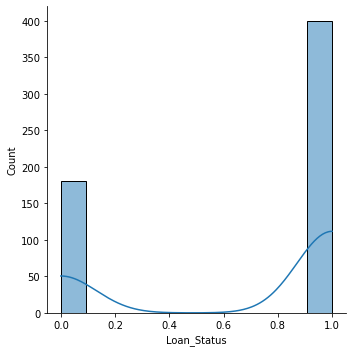

In [127]:
sns.displot(df_new_z['Loan_Status'],kde=True)

In [128]:
# This gives the distribution of our column Loan_Status. Better we can go for countplot for the target classes

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

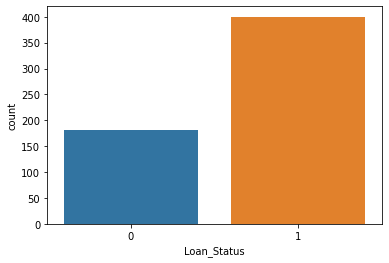

In [129]:
sns.countplot(df_new_z['Loan_Status'])

In [130]:
df_new_z['Loan_Status'].value_counts()

1    400
0    181
Name: Loan_Status, dtype: int64

In [131]:
# Here we can clearly see that the classes 0 and 1 are not balanced
# Lets try to balance them first

In [132]:

# We need to split the data into X and y before we could try balancing the classes
# Splitting the dataset into X features and y label

X = df_new_z.drop(["Loan_Status"],axis=1)
y = df_new_z["Loan_Status"]

In [133]:
# Applying over-sampling to balance our classes

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [134]:
y.value_counts()

1    400
0    400
Name: Loan_Status, dtype: int64

In [135]:
# Now that we see that our classes are balanced
# Class 0 has 400 values
# Class 1 has 400 values

In [136]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.0203773  0.03391245 0.05644908 0.02392151 0.01817766 0.19536281
 0.04889418 0.32643623 0.06150697 0.21496183]


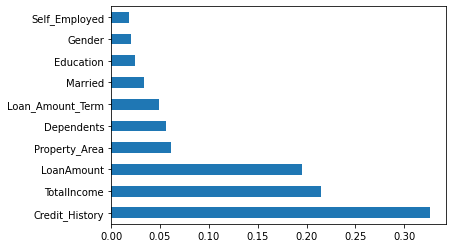

In [137]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [138]:
# This proves the very important feature is "Credit_History"

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Finding the best random state

In [140]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8458333333333333  on Random_state  115


In [141]:
# The best random state is 115 for the best accuracy score of 0.84.5

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =maxRS) 

# Standardizing the data

In [143]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [144]:
# performed train test split with the found best random state

In [145]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

pred1 =DTC.predict(X_test)
acc1=classification_report(y_test,pred1)
print(acc1)

#confusion matrix


cf_matrix = confusion_matrix(y_test, pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       136
           1       0.78      0.79      0.78       104

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

[[113  23]
 [ 22  82]]


In [146]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 81% Accuracy using DecisionTreeClassifier
# We can observe the confusion matrix as well

In [147]:
# Lets try to check the Accuracy using Random Forest
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)


pred1= RFC.predict(X_test)
acc1=classification_report(y_test,pred1)
print(acc1)

#confusion matrix

cf_matrix = confusion_matrix(y_test, pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       136
           1       0.76      0.88      0.82       104

    accuracy                           0.83       240
   macro avg       0.83      0.84      0.83       240
weighted avg       0.84      0.83      0.83       240

[[107  29]
 [ 12  92]]


In [148]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by Random Forest Classifier is 83%
# We can observe the confusion matrix as well

In [149]:
# Let's try to check the Accuracy using SupportVectorClassifier
SV=SVC()
SV.fit(X_train,y_train)
pred1=SV.predict(X_test)
acc=classification_report(y_test,pred1)
print(acc)

#confusion matrix

cf_matrix = confusion_matrix(y_test, pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.92      0.62      0.74       136
           1       0.65      0.93      0.77       104

    accuracy                           0.75       240
   macro avg       0.79      0.78      0.75       240
weighted avg       0.81      0.75      0.75       240

[[84 52]
 [ 7 97]]


In [150]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by SupportVector Classifier is 75%
# We can observe the confusion matrix as well

In [151]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)

pred_sgd1 = sgd.predict(X_test)
acc1=classification_report(y_test,pred_sgd1)
print(acc1)  

#confusion matrix
cf_matrix = confusion_matrix(y_test, pred_sgd1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.80      0.57      0.66       136
           1       0.59      0.82      0.69       104

    accuracy                           0.68       240
   macro avg       0.70      0.69      0.67       240
weighted avg       0.71      0.68      0.67       240

[[77 59]
 [19 85]]


In [152]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by SGD Classifier is 68%
# We can observe the confusion matrix as well

In [153]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train,y_train)

y_pred1 = logreg.predict(X_test)
acc1=classification_report(y_test,y_pred1)
print(acc1)   

#confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.60      0.73       136
           1       0.64      0.95      0.77       104

    accuracy                           0.75       240
   macro avg       0.79      0.77      0.75       240
weighted avg       0.81      0.75      0.75       240

[[81 55]
 [ 5 99]]


In [154]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by Logistic Regression model is 75%
# We can observe the confusion matrix as well

In [155]:
# Let's try to check the Accuracy using XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50, max_depth=4) 
model.fit(X_train, y_train)


y_pred1=model.predict(X_test)
acc1=classification_report(y_test,y_pred1)
print (acc1)

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

[07:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       136
           1       0.70      0.82      0.76       104

    accuracy                           0.77       240
   macro avg       0.77      0.78      0.77       240
weighted avg       0.78      0.77      0.77       240

[[100  36]
 [ 19  85]]


In [156]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by XGBClassifier model is 77%
# We can observe the confusion matrix as well

In [157]:
# All these accuracy score may also be due to overfitting, so just can't decide with the accuracy score
# 1) Lets find the cross validation score first 
# 2) lets find the difference of accuracy score and cross validation score

# The model with the least difference is the best model



In [158]:
print(cross_val_score(DTC,X,y,cv=5).mean())

0.7637499999999999


In [159]:
# The cross validation score for DecisionTreeClassifier is approx 76.3%

In [160]:
print(cross_val_score(RFC,X,y,cv=5).mean())

0.82125


In [161]:
# The cross validation score for RandomForestClassifier is 82.1%

In [162]:
print(cross_val_score(SV,X,y,cv=5).mean())

0.5037499999999999


In [163]:
# The cross validation score for SupportVector Classifier is 50.4%

In [164]:
print(cross_val_score(sgd,X,y,cv=5).mean())

0.515


In [165]:
# The cross validation score for StochasticGradientDescent Classifier is 51.5%

In [166]:
print(cross_val_score(logreg,X,y,cv=5).mean())

0.73625


In [167]:
# The cross validation score for LogisticRegression Classifier is 73.6%

In [168]:
print(cross_val_score(model,X,y,cv=5).mean())

[07:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [169]:
# The cross validation score for XGBClassifier is 81.5%

In [170]:
# The difference between the accuracy score and cross validation score for DTC is 4.7%
# The difference between the accuracy score and cross validation score for RFC is 0.9%
# The difference between the accuracy score and cross validation score for SVC is 24%
# The difference between the accuracy score and cross validation score for SGD is 16%
# The difference between the accuracy score and cross validation score for Logregression is 1.4%
# The difference between the accuracy score and cross validation score for XGB is 4.5%

In [171]:
# So here the two models SVC and SGD are overfitting
# So here we can infer that RandomForest is performing well giving us the least difference
# Lets perform hyper parameter tuning and check if we could increase the performance of our models.


In [172]:
# Let's perform hyper-parameter tuning

# Hyper-paramter tuning on all models

In [173]:
from sklearn.model_selection import GridSearchCV

print('model=',DecisionTreeClassifier)
param_grid = {"max_depth": [80, 90, 100, 110],
              "max_features": range(3,12,2),
              "min_samples_leaf": range(2,8)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'max_depth': 80, 'max_features': 5, 'min_samples_leaf': 7}
0.7666666666666667
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       136
           1       0.68      0.86      0.76       104

    accuracy                           0.77       240
   macro avg       0.77      0.78      0.77       240
weighted avg       0.79      0.77      0.77       240


[[100  36]
 [ 19  85]]


In [174]:
# The accuracy score using hyper-parameter tuning for DecisionTree Classifier is 77%

In [175]:
print('model=',RandomForestClassifier)
param_grid= {'bootstrap': [True],'max_depth': [80, 90, 100],
             'max_features':  range(3,12,2),
             'min_samples_leaf':range(2,8),
             'min_samples_split': [2,4,8, 10,],
             'n_estimators': [100, 150,200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'sklearn.ensemble._forest.RandomForestClassifier'>
{'bootstrap': True, 'max_depth': 90, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.8
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       136
           1       0.72      0.88      0.79       104

    accuracy                           0.80       240
   macro avg       0.80      0.81      0.80       240
weighted avg       0.82      0.80      0.80       240


[[100  36]
 [ 19  85]]


In [176]:
# The accuracy score using hyper-parameter tuning for RandomForest Classifier is 80%

In [177]:
print('model=',SVC)        
param_grid={ 'C':[0.1,1,10,100],
             'gamma':['scale','auto'],
             'kernel':['linear']}
grid=GridSearchCV(SVC(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'sklearn.svm._classes.SVC'>
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.6916666666666667
              precision    recall  f1-score   support

           0       0.98      0.46      0.63       136
           1       0.59      0.99      0.74       104

    accuracy                           0.69       240
   macro avg       0.78      0.73      0.68       240
weighted avg       0.81      0.69      0.68       240


[[100  36]
 [ 19  85]]


In [ ]:
# The accuracy score using hyper-parameter tuning for SupportVector Classifier is 69%

In [178]:
print('model=',sgd)
param_grid= {'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
            'penalty':['l1','l2','elasticnet'],
            'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000],
             'learning_rate':['constant','optimal','invscaling','adaptive'],
             'class_weight':[{1:0.5,0:0.5},{1:0.4,0:0.6},{1:0.6,0:0.4},{1:0.7,0:0.3}],
             'eta0':[1,10,100]
            }
grid=GridSearchCV(SGDClassifier(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= SGDClassifier(penalty=None)
{'alpha': 0.01, 'class_weight': {1: 0.4, 0: 0.6}, 'eta0': 10, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l1'}
0.7416666666666667
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       136
           1       0.66      0.83      0.74       104

    accuracy                           0.74       240
   macro avg       0.75      0.75      0.74       240
weighted avg       0.76      0.74      0.74       240


[[100  36]
 [ 19  85]]


In [ ]:
# The accuracy score using hyper-parameter tuning for SGDClassifier is 74%

In [179]:
print('model=',XGBClassifier)
param_grid= {'max_depth':range(3,15,2),'min_child_weight':range(5,10)}
grid=GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'xgboost.sklearn.XGBClassifier'>
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[08:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 7, 'min_child_weight': 5}
0.775
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       136
           1       0.70      0.86      0.77       104

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.77       240
weighted avg       0.79      0.78      0.78       240

[[100  36]
 [ 19  85]]


In [ ]:
# The accuracy score using hyper-parameter tuning for XGBClassifier is 78%

In [180]:
print('model=',logreg)
param_grid = {'penalty': ['l1','l2','elasticnet','none'],
             'C':[0.1,1,10,100],
            'solver':["netwon-cg","lbfgs","liblinear","sag","saga"]
             }
grid=GridSearchCV(LogisticRegression(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")


cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)


model= LogisticRegression(C=100000.0)
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7458333333333333
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       136
           1       0.64      0.96      0.77       104

    accuracy                           0.75       240
   macro avg       0.79      0.77      0.74       240
weighted avg       0.82      0.75      0.74       240


[[100  36]
 [ 19  85]]


In [ ]:
# The accuracy score using hyper-parameter tuning for Logistic Regression is 75%

In [ ]:
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for DTC is 0.7%
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for RFC is 2.1%
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for SVC is 18.6%
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for SGD is 22%
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for Logregression is 1.4%
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for XGB is 3.5%

 It is very much clear that we have increases our model performances after tuning them using Hyper-parameter tuning

Our best model is Decision Tree Classifier

In [181]:
# Let's plot the AUC-ROC Curve 

In [182]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

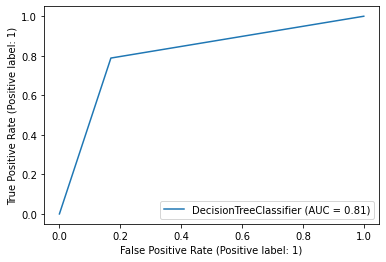

In [183]:
plot_roc_curve(DTC,X_test,y_test)

In [ ]:
# The AUC Score for Decision Tree Classifier is 0.81

# Saving the model

In [191]:
# Serializing or saving the model
# Importing the necessary library for saving the model
import joblib
joblib.dump(DTC,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [192]:
mod=joblib.load("FinalModel.pkl")

In [193]:
print(mod.predict(X_test))

[0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1]
